In [245]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression

pd.set_option("display.max_columns", 100)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
sns.set()

plt.style.use('ggplot')

In [36]:
df = pd.read_csv('data/reg_games_stats_2018.csv')
df = df.drop(df.columns[0], axis=1)
df.h_top = df.h_top.apply(lambda x: sum([a*b for a,b in zip([60, 1], map(int,x.split(':')))])/60)
df.a_top = df.a_top.apply(lambda x: sum([a*b for a,b in zip([60, 1], map(int,x.split(':')))])/60)


In [149]:
df.columns[12::2]

Index(['h_totfd', 'h_totyds', 'h_pyds', 'h_ryds', 'h_pen', 'h_penyds',
       'h_trnovr', 'h_pt', 'h_ptyds', 'h_ptavg', 'h_top'],
      dtype='object')

In [184]:
def add_nets(df, var_list):
    for item in var_list[::2]:
        stat_term = item.replace('h_', '')
        df['net_' + stathttp://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy_term] = df[item] - df['a_'+stat_term]
    return df
    

In [199]:
data = df.iloc[:,[ 2, 3, 8,9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
data = add_nets(data, df.columns[12:])
net_data = data.iloc[:, [0, 1,2, 3, 4, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]]
net_data.iloc[:, 11] = -net_data.iloc[:, 11]
net_data = net_data[~(net_data.home_score == net_data.away_score)]


/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/reiffd/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Initial Look at the Data
- No null values


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 28 columns):
home_team     256 non-null object
away_team     256 non-null object
home_score    256 non-null int64
away_score    256 non-null int64
h_win         256 non-null int64
a_win         256 non-null int64
h_totfd       256 non-null int64
a_totfd       256 non-null int64
h_totyds      256 non-null int64
a_totyds      256 non-null int64
h_pyds        256 non-null int64
a_pyds        256 non-null int64
h_ryds        256 non-null int64
a_ryds        256 non-null int64
h_pen         256 non-null int64
a_pen         256 non-null int64
h_penyds      256 non-null int64
a_penyds      256 non-null int64
h_trnovr      256 non-null int64
a_trnovr      256 non-null int64
h_pt          256 non-null int64
a_pt          256 non-null int64
h_ptyds       256 non-null int64
a_ptyds       256 non-null int64
h_ptavg       256 non-null int64
a_ptavg       256 non-null int64
h_top         256 non-null float64


In [39]:
print("Number of teams in our data:", len(data['home_team'].unique()))

Number of teams in our data: 32


In [40]:
df.describe()

,game_id,week,season,home_score,away_score,h_win,a_win,h_totfd,a_totfd,h_totyds,a_totyds,h_pyds,a_pyds,h_ryds,a_ryds,h_pen,a_pen,h_penyds,a_penyds,h_trnovr,a_trnovr,h_pt,a_pt,h_ptyds,a_ptyds,h_ptavg,a_ptavg,h_top,a_top
count,2.560000e+02,256.000000,256.0,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,2.018108e+09,9.027344,2018.0,24.445312,22.242188,0.597656,0.394531,21.000000,19.867188,359.664062,344.765625,242.578125,232.957031,117.085938,111.808594,6.562500,6.894531,56.011719,58.921875,1.265625,1.453125,4.273438,4.375000,190.789062,198.019531,39.101562,40.167969,30.435156,30.056120
std,1.152649e+04,5.027301,0.0,10.629451,9.916709,0.491331,0.489707,5.054992,5.236180,87.471835,89.232236,84.777782,83.908225,54.564375,48.904213,2.778771,2.979770,28.117189,29.837628,1.157986,1.264039,1.824516,1.762351,84.806877,84.699212,8.337338,6.807659,4.375236,4.274933
min,2.018091e+09,1.000000,2018.0,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,89.000000,119.000000,20.000000,37.000000,14.000000,22.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.683333,19.800000
25%,2.018101e+09,5.000000,2018.0,17.000000,16.000000,0.000000,0.000000,18.000000,16.000000,298.750000,282.750000,182.750000,170.000000,77.000000,76.750000,5.000000,5.000000,37.750000,36.750000,0.000000,0.000000,3.000000,3.000000,133.750000,137.750000,36.000000,37.000000,27.483333,27.225000
50%,2.018110e+09,9.000000,2018.0,24.000000,22.000000,1.000000,0.000000,21.000000,19.000000,368.000000,340.000000,232.000000,225.500000,108.000000,105.500000,6.000000,7.000000,52.000000,55.000000,1.000000,1.000000,4.000000,4.000000,187.000000,195.500000,40.000000,41.000000,30.416667,30.008333
75%,2.018120e+09,13.250000,2018.0,31.000000,28.000000,1.000000,1.000000,24.000000,24.000000,416.250000,411.250000,300.000000,288.000000,149.250000,139.000000,8.000000,9.000000,70.000000,77.000000,2.000000,2.000000,5.000000,6.000000,245.000000,258.000000,44.000000,44.000000,33.458333,32.933333
max,2.018123e+09,17.000000,2018.0,54.000000,51.000000,1.000000,1.000000,34.000000,35.000000,576.000000,576.000000,462.000000,452.000000,323.000000,273.000000,16.000000,15.000000,172.000000,155.000000,5.000000,6.000000,12.000000,9.000000,522.000000,465.000000,59.000000,58.000000,45.550000,43.316667


In [87]:
data.iloc[:, 6]


0      18
1      26
2      15
3      26
4      23
       ..
251    24
252    28
253    18
254    16
255    11
Name: h_totfd, Length: 256, dtype: int64

In [49]:
team_colors = {'PHI': {(0,76,84), (165,172,175)},
 'BAL': {(26,25,95), (158,124,12)},
 'NYG': {(1,35,82), (163,13,45)},
 'NO': {(211,188,141), (16,24,31)},
 'NE': {(0,34,68), (198,12,48)},
 'MIN': {(79,38,131), (255, 198,47)},
 'MIA': {(0,142,151), (252,76,2)},
 'IND': {(0,44,95), (162,170,173)},
 'CLE': {(49,29,0), (255,60,0)},
 'LAC': {(0,128,198), (255,194,14)},
 'DEN': {(0,34,68), (251,79,20)},
 'CAR': {(0,133,202), (16,24,32)},
 'ARI': {(151,35,63), (0,0,0)},
 'GB': {(24,48,40), (255,184,28)},
 'DET': {(0,118,182), (176,183,188)},
 'OAK': {(0,0,0), (165,172,175)},
 'CIN': {(251,79,20), (0,0,0)},
 'ATL': {(167,25,48), (0,0,0)},
 'WAS': {(63,16,16), (255,182,18)},
 'TEN': {(12,35,64), (65,143,222)},
 'TB': {(213,10,10), (255,121,0)},
 'PIT': {(255,182,18), (0, 0,0)},
 'NYJ': {(18,87,64), (0,0,0)},
 'BUF': {(0,51,141), (198,12,48)},
 'SF': {(170,0,0), (173,153,93)},
 'LA': {(0,34,68), (134,109,75)},
 'JAX': {(0,103,120), (159,121,44)},
 'DAL': {(0,34,68), (134,147,151)},
 'CHI': {(11,22,42), (200,56,3)},
 'HOU': {(167,25,48), (3,32,47)},
 'KC': {(227,24,55), (255,184,28)},
 'SEA': {(0,34,68), (105,190,40)}}

In [84]:
def univariate_plots(x, y, title, rows, cols, y_title):
    fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (30, 20))
    axs = axs.ravel()
    for i in range(len(x)):
        try:
            axs[i].scatter(x.iloc[:, i], y)
            axs[i].set_title(title[i] + " vs." + y_title)
        except:
            continue
    plt.show()
#     fig.savefig('eda.png')

In [70]:
x = data.iloc[:, 4:]
data.iloc[:, 2]

0      18
1      47
2      15
3      40
4      27
       ..
251    26
252    48
253    16
254    27
255    17
Name: home_score, Length: 256, dtype: int64

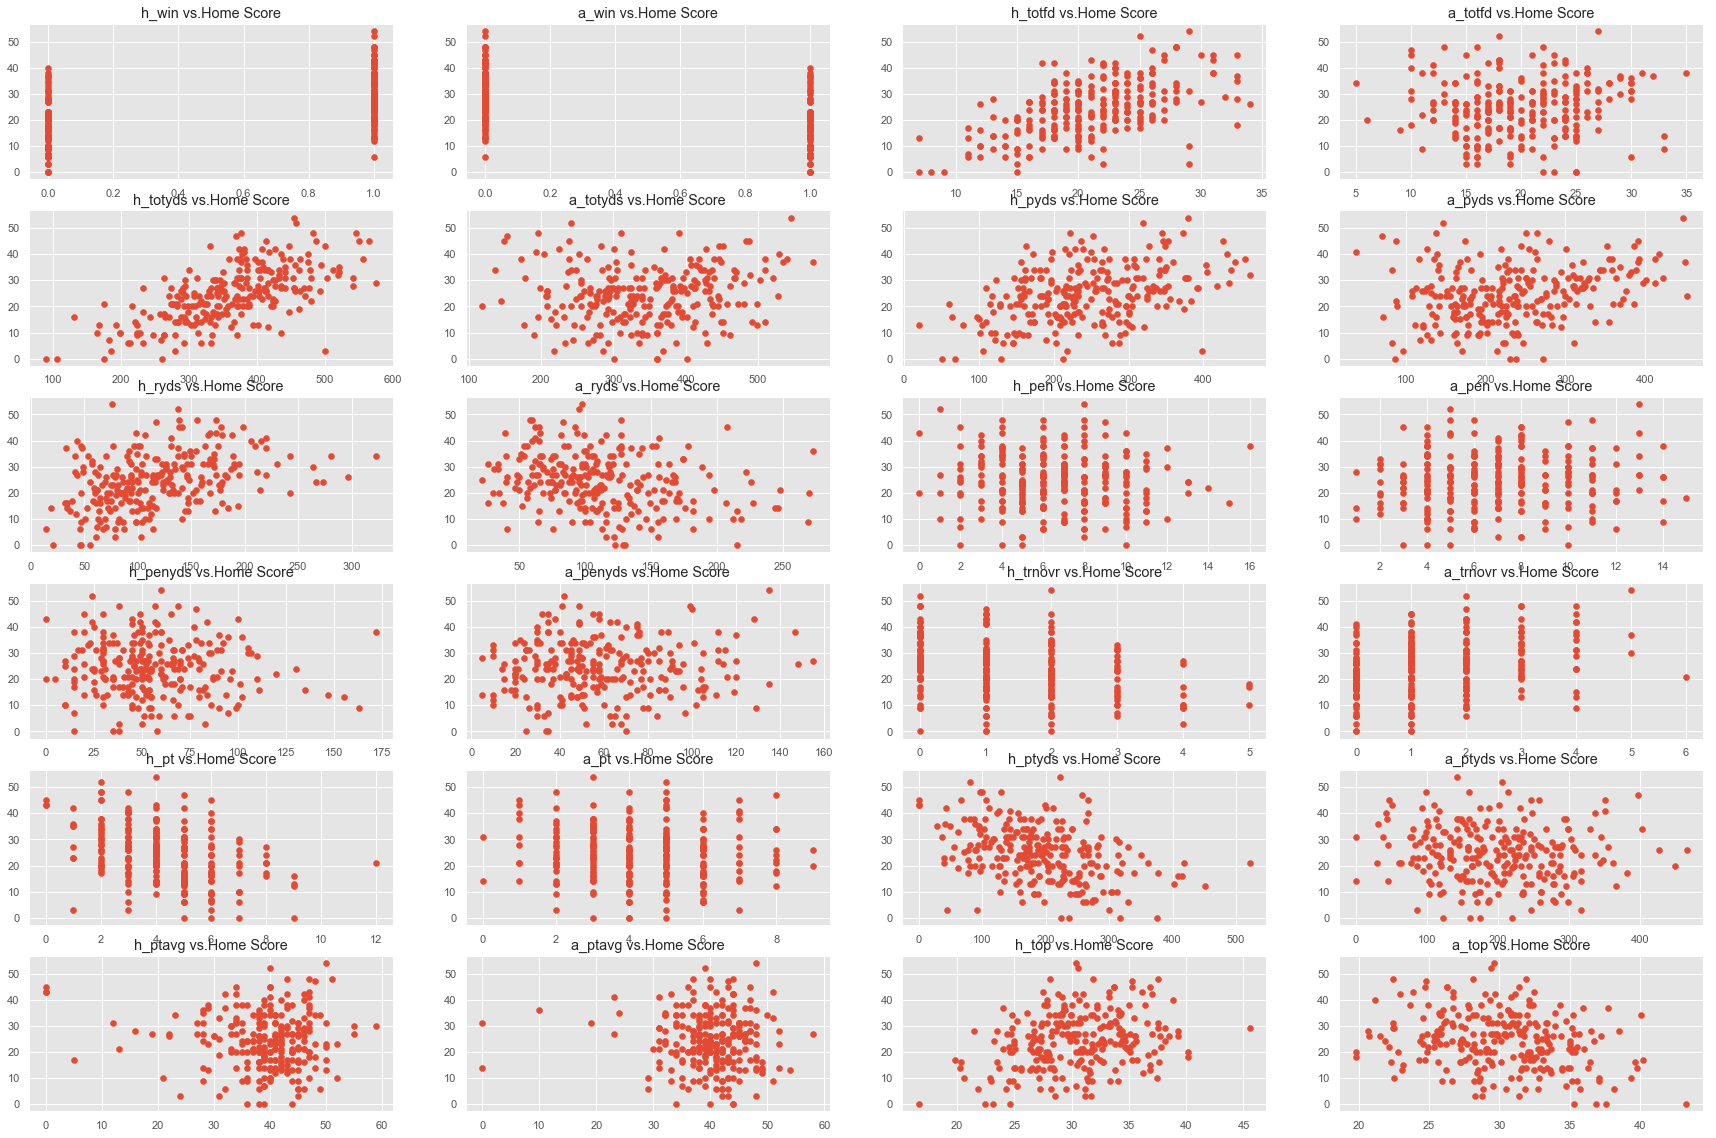

In [85]:
univariate_plots(x, data.iloc[:,2], data.columns[4:], 6, 4, 'Home Score')



In [122]:
home_primary_colors = list(list(list(team_colors[data.home_team[i]])[0]) for i in range(len(data.home_team)))
home_secondary_colors = list(list(list(team_colors[data.home_team[i]])[1]) for i in range(len(data.home_team)))
np.array(home_primary_colors)

array([[  0,  76,  84],
       [ 26,  25,  95],
       [163,  13,  45],
       [211, 188, 141],
       [198,  12,  48],
       [ 79,  38, 131],
       [  0, 142, 151],
       [162, 170, 173],
       [255,  60,   0],
       [  0, 128, 198],
       [251,  79,  20],
       [ 16,  24,  32],
       [151,  35,  63],
       [255, 184,  28],
       [176, 183, 188],
       [  0,   0,   0],
       [251,  79,  20],
       [  0,   0,   0],
       [255, 182,  18],
       [ 12,  35,  64],
       [213,  10,  10],
       [255, 182,  18],
       [ 18,  87,  64],
       [  0,  51, 141],
       [255, 184,  28],
       [211, 188, 141],
       [173, 153,  93],
       [134, 109,  75],
       [159, 121,  44],
       [251,  79,  20],
       [134, 147, 151],
       [200,  56,   3],
       [255,  60,   0],
       [  0,   0,   0],
       [255, 182,  18],
       [  0,  76,  84],
       [ 79,  38, 131],
       [  0, 142, 151],
       [ 26,  25,  95],
       [ 16,  24,  32],
       [  3,  32,  47],
       [159, 121

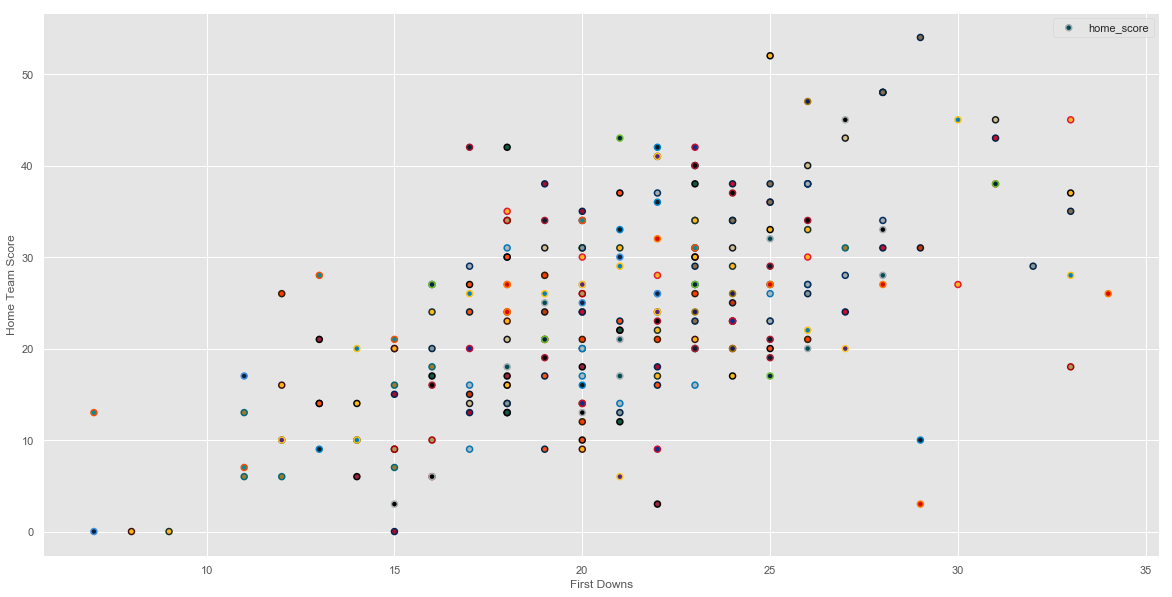

In [133]:
fig, axs = plt.subplots(figsize=(20, 10))

axs.scatter(data.iloc[:, 6], data.iloc[:,2], c = np.array(home_primary_colors)/255.0, edgecolors=np.array(home_secondary_colors)/255.0, linewidth=1.5)
plt.xlabel('First Downs')
plt.ylabel('Home Team Score')
plt.legend()
plt.show()

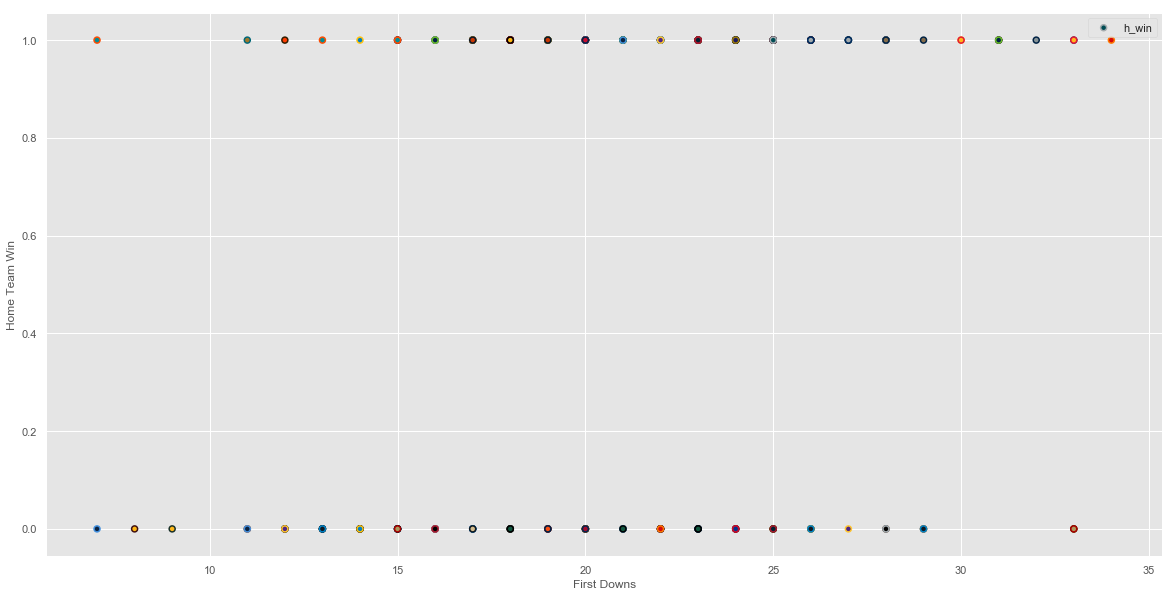

In [137]:
fig, axs = plt.subplots(figsize=(20, 10))

axs.scatter(data.iloc[:, 6], data.iloc[:,4], c = np.array(home_primary_colors)/255.0, edgecolors=np.array(home_secondary_colors)/255.0, linewidth=1.5)
plt.xlabel('First Downs')
plt.ylabel('Home Team Win')
plt.legend()
plt.show()

In [174]:
net_data

,home_team,away_team,home_score,away_score,h_win,net_totfd,net_totyds,net_pyds,net_ryds,net_pen,net_penyds,net_trnovr,net_pt,net_ptyds,net_ptavg,net_top
0,PHI,ATL,18,12,1,2,-67,-106,39,-4,-34,1,0,27,4,4.333333
1,BAL,BUF,47,3,1,16,216,182,34,-1,-22,-1,-3,-140,5,10.466667
2,NYG,JAX,15,20,0,-2,19,42,-23,-5,-76,1,-2,-17,6,0.966667
3,NO,TB,40,48,0,0,-54,15,-69,1,7,2,2,114,4,-4.300000
4,NE,HOU,27,20,1,2,64,109,-45,0,-8,1,0,51,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,BAL,CLE,26,24,1,6,37,-209,246,6,30,-2,0,16,-2,17.000000
252,LA,SF,48,32,1,6,-14,-42,28,1,16,-4,1,31,-1,3.666667
253,PIT,CIN,16,13,1,9,147,207,-60,0,-15,1,-1,-89,-5,8.733333
254,SEA,ARI,27,24,1,4,93,-4,97,-2,-10,-1,3,83,-18,-1.700000


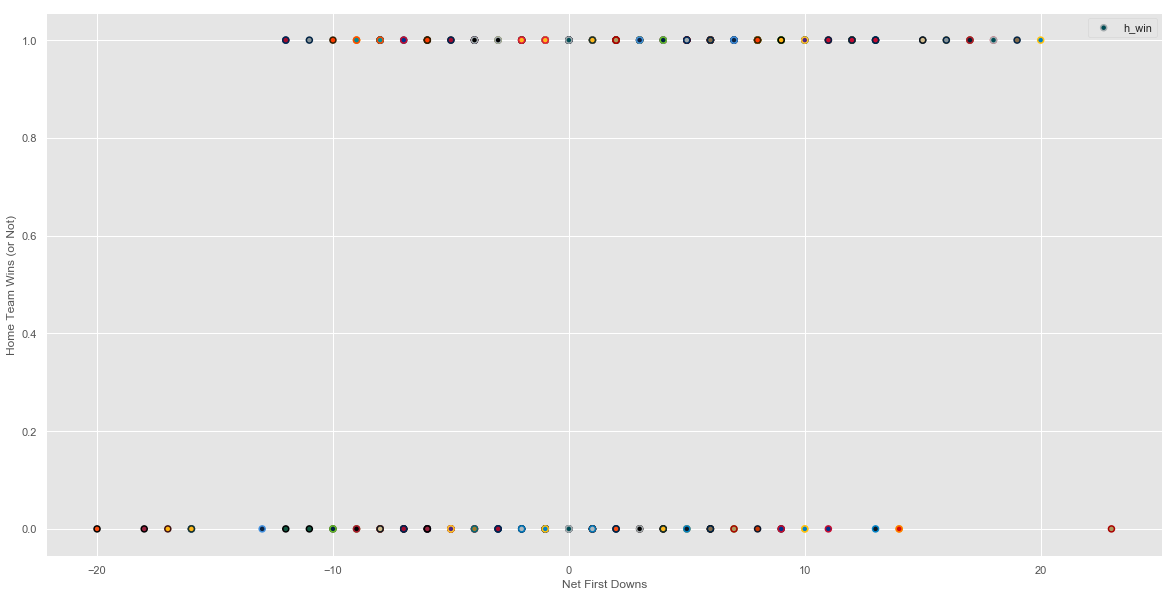

In [175]:
fig, axs = plt.subplots(figsize=(20, 10))

axs.scatter(net_data.iloc[:, 5], net_data.iloc[:,4], c = np.array(home_primary_colors)/255.0, edgecolors=np.array(home_secondary_colors)/255.0, linewidth=1.5)
plt.xlabel('Net First Downs')
plt.ylabel('Home Team Wins (or Not)')
plt.legend()
plt.show()

In [213]:
## Fit a logistic regression
y = net_data.iloc[:, 4] # home team wins
x = np.array(net_data.iloc[:, 11]).reshape(-1, 1) # just net turnovers for now
log_model_w = LogisticRegression()
log_model_w.fit(x,y) # fitting class to just weight for now

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [214]:
x_ = np.linspace(-5,5,100).reshape(-1,1)
sigmoid = log_model_w.predict_proba(x_)[:,1] # probability of positive class (horse)

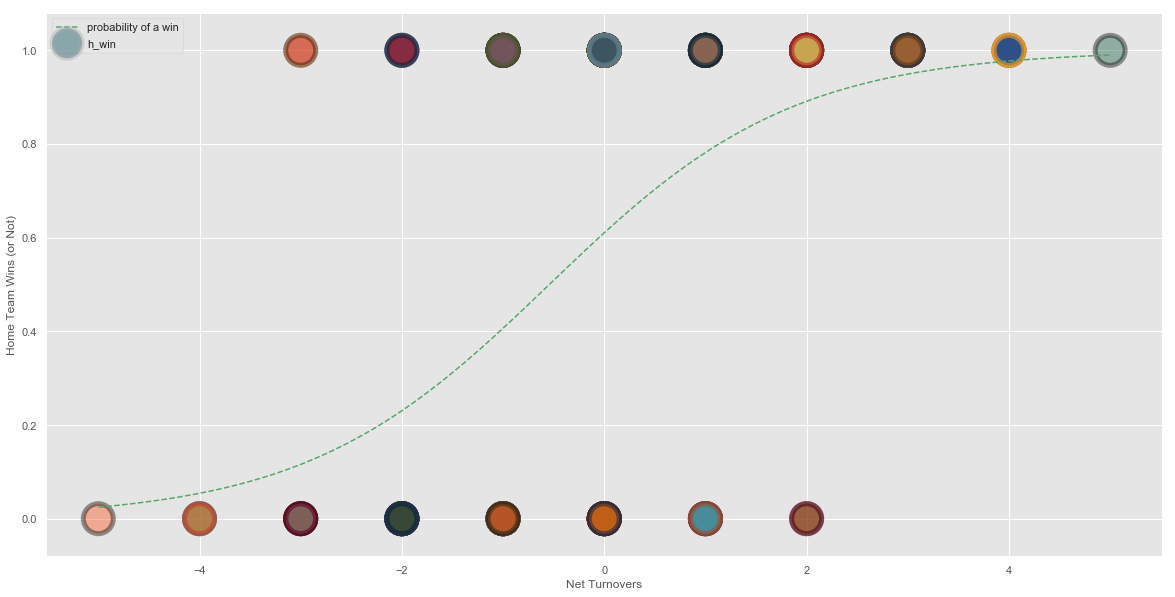

In [216]:
fig, axs = plt.subplots(figsize=(20, 10))

axs.scatter(net_data.iloc[:, 11], net_data.iloc[:,4], c = np.array(home_primary_colors)/255.0, edgecolors=np.array(home_secondary_colors)/255.0, linewidth=5, s = 30**2, alpha=0.4)
axs.plot(x_, sigmoid, 'g--', label='probability of a win')
plt.xlabel('Net Turnovers')
plt.ylabel('Home Team Wins (or Not)')
plt.legend()
plt.show()

In [224]:
net_data.iloc[:, 5:]

,net_totfd,net_totyds,net_pyds,net_ryds,net_pen,net_penyds,net_trnovr,net_pt,net_ptyds,net_ptavg,net_top
0,2,-67,-106,39,-4,-34,-1,0,27,4,4.333333
1,16,216,182,34,-1,-22,1,-3,-140,5,10.466667
2,-2,19,42,-23,-5,-76,-1,-2,-17,6,0.966667
3,0,-54,15,-69,1,7,-2,2,114,4,-4.300000
4,2,64,109,-45,0,-8,-1,0,51,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...
251,6,37,-209,246,6,30,2,0,16,-2,17.000000
252,6,-14,-42,28,1,16,4,1,31,-1,3.666667
253,9,147,207,-60,0,-15,-1,-1,-89,-5,8.733333
254,4,93,-4,97,-2,-10,1,3,83,-18,-1.700000


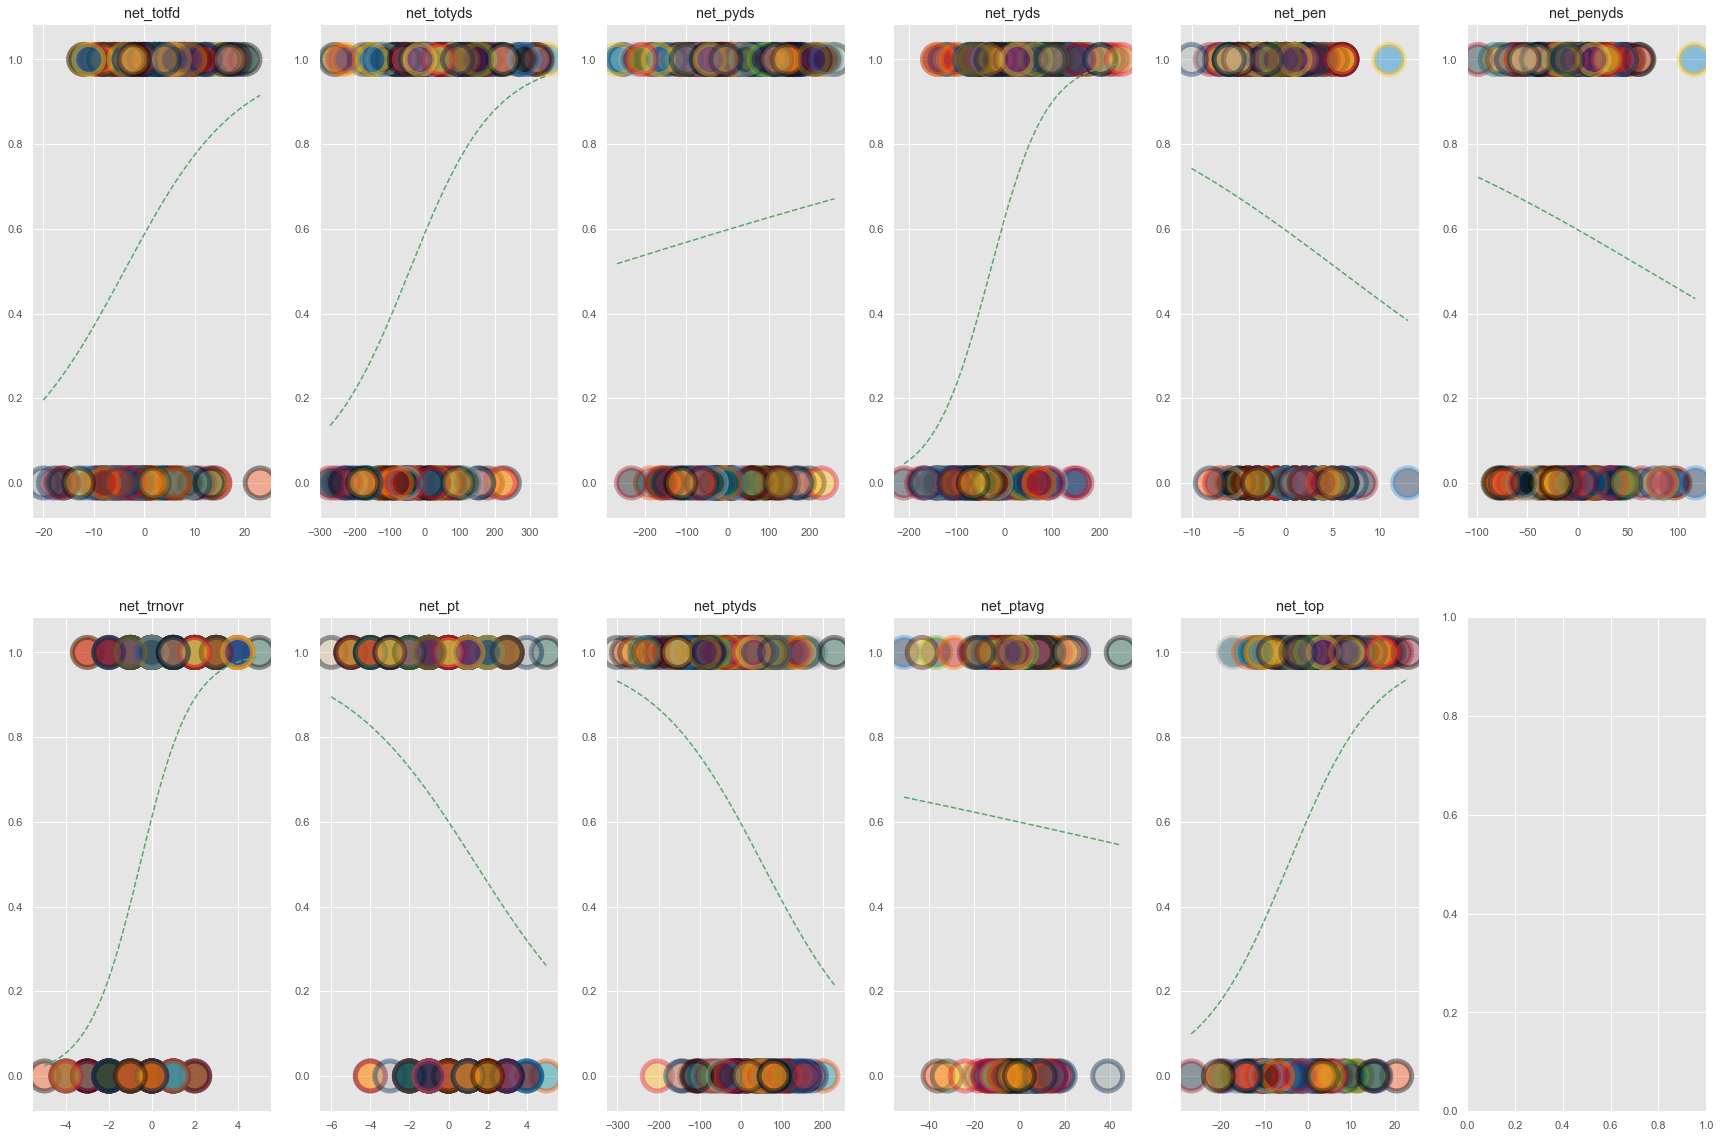

In [239]:
fig, axs = plt.subplots(2,6, figsize=(30, 20))
axs = axs.ravel()
for i in range(5, len(net_data.columns)):
    y = net_data.iloc[:, 4] # home team wins
    x = np.array(net_data.iloc[:, i]).reshape(-1, 1) 
    log_model_w = LogisticRegression()
    log_model_w.fit(x,y) # fitting class to just weight for now
    x_ = np.linspace(min(net_data.iloc[:, i]),max(net_data.iloc[:, i]),250).reshape(-1,1)
    sigmoid = log_model_w.predict_proba(x_)[:,1] # probability of positive class (horse)
    axs[i-5].scatter(net_data.iloc[:, i], y, c = np.array(home_primary_colors)/255.0, edgecolors=np.array(home_secondary_colors)/255.0, linewidth=5, s = 30**2, alpha=0.4)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

In [238]:
net_data

,home_team,away_team,home_score,away_score,h_win,net_totfd,net_totyds,net_pyds,net_ryds,net_pen,net_penyds,net_trnovr,net_pt,net_ptyds,net_ptavg,net_top
0,PHI,ATL,18,12,1,2,-67,-106,39,-4,-34,-1,0,27,4,4.333333
1,BAL,BUF,47,3,1,16,216,182,34,-1,-22,1,-3,-140,5,10.466667
2,NYG,JAX,15,20,0,-2,19,42,-23,-5,-76,-1,-2,-17,6,0.966667
3,NO,TB,40,48,0,0,-54,15,-69,1,7,-2,2,114,4,-4.300000
4,NE,HOU,27,20,1,2,64,109,-45,0,-8,-1,0,51,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,BAL,CLE,26,24,1,6,37,-209,246,6,30,2,0,16,-2,17.000000
252,LA,SF,48,32,1,6,-14,-42,28,1,16,4,1,31,-1,3.666667
253,PIT,CIN,16,13,1,9,147,207,-60,0,-15,-1,-1,-89,-5,8.733333
254,SEA,ARI,27,24,1,4,93,-4,97,-2,-10,1,3,83,-18,-1.700000


In [250]:
def plot_confusion_matrix(cm, ax, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    p = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title,fontsize=font_size)
    
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center", size = font_size,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    ax.set_ylabel('True label',fontsize=font_size)
    ax.set_xlabel('Predicted label',fontsize=font_size)

| TN | FP |
| FN | TP |

[[ 64  37]
 [ 28 125]]
Confusion matrix, without normalization
[[ 64  37]
 [ 28 125]]


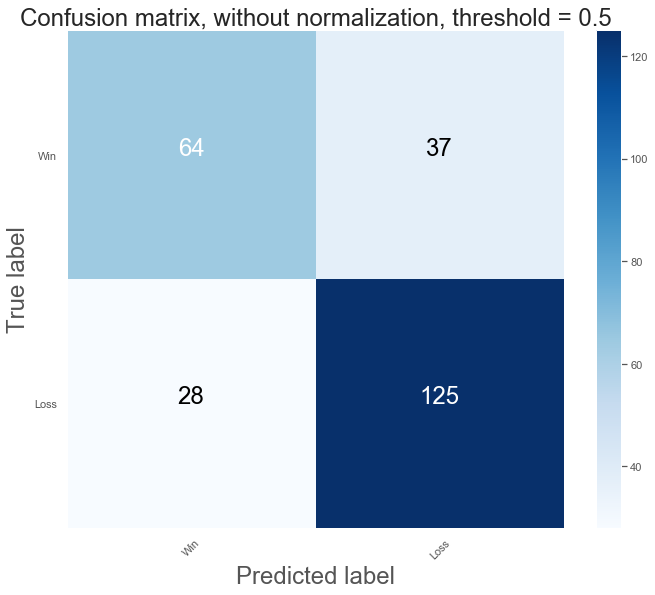

In [246]:
font_size = 24


## Fit a logistic regression
y = net_data.iloc[:, 4] # home team wins
x = np.array(net_data.iloc[:, 11]).reshape(-1, 1) # just net turnovers for now

## Run logistic regression on all the data
classifier = LogisticRegression()
# note using .predict() below, which uses default 0.5 for a binary classifier
y_pred = classifier.fit(x,y).predict(x) # agh!
y_true = y

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print("| TN | FP |\n| FN | TP |\n")
print(cnf_matrix)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.grid(False)
class_names = ["Win","Loss"]
plot_confusion_matrix(cnf_matrix, ax, classes=class_names,
                      title='Confusion matrix, without normalization, threshold = 0.5')

Confusion matrix, without normalization
[[ 41  60]
 [ 29 124]]
Confusion matrix, without normalization
[[ 50  51]
 [ 30 123]]
Confusion matrix, without normalization
[[  0 101]
 [  0 153]]
Confusion matrix, without normalization
[[ 62  39]
 [ 26 127]]
Confusion matrix, without normalization
[[  7  94]
 [  6 147]]
Confusion matrix, without normalization
[[  7  94]
 [  1 152]]
Confusion matrix, without normalization
[[ 64  37]
 [ 28 125]]
Confusion matrix, without normalization
[[ 29  72]
 [ 20 133]]
Confusion matrix, without normalization
[[ 38  63]
 [ 29 124]]
Confusion matrix, without normalization
[[  0 101]
 [  0 153]]
Confusion matrix, without normalization
[[ 47  54]
 [ 28 125]]


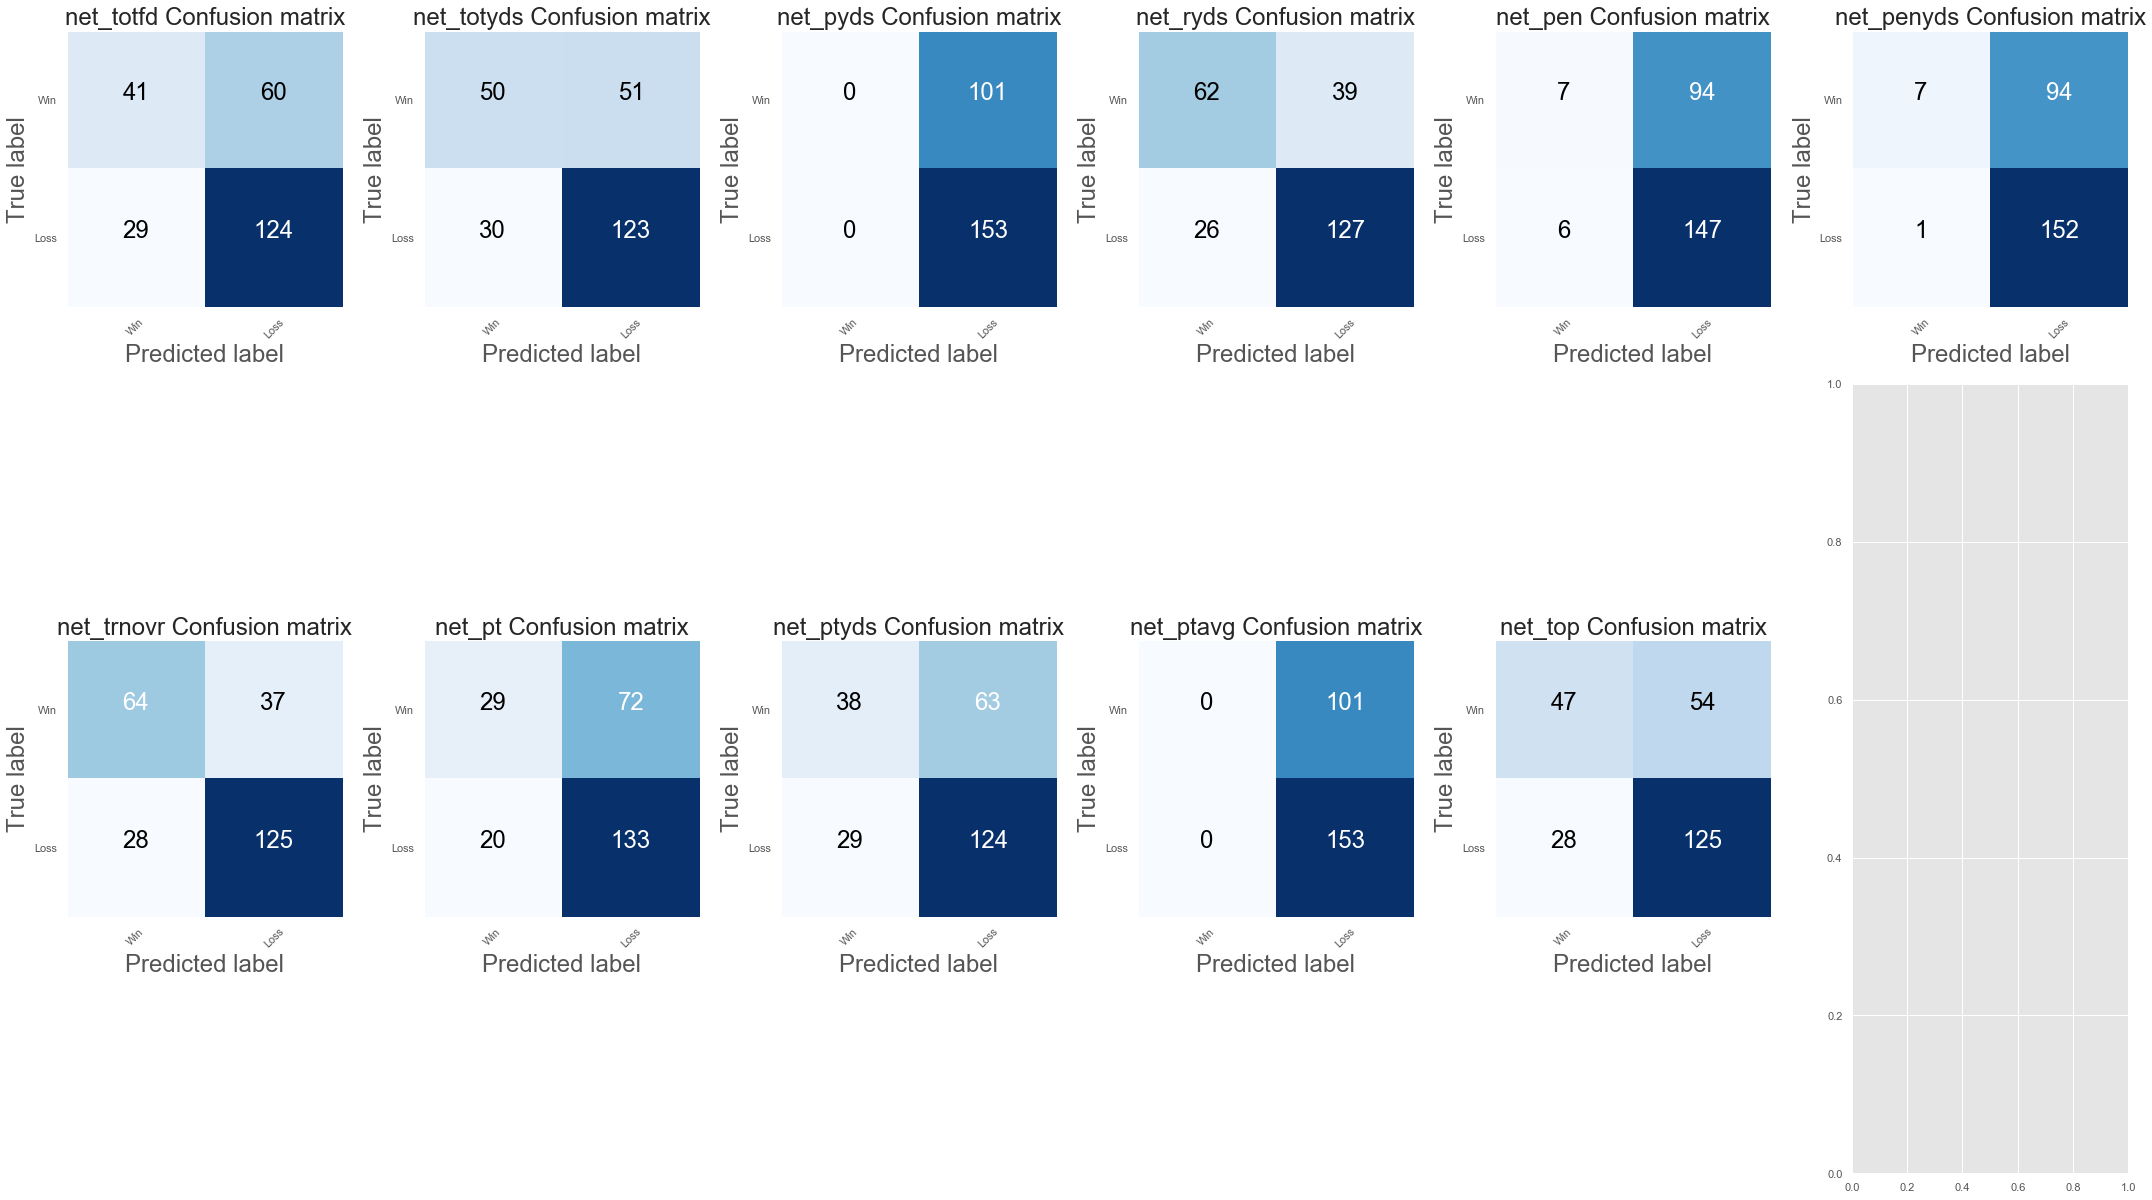

In [251]:
fig, axs = plt.subplots(2,6, figsize=(30, 20))
axs = axs.ravel()
for i in range(5, len(net_data.columns)):
    y = net_data.iloc[:, 4] # home team wins
    x = np.array(net_data.iloc[:, i]).reshape(-1, 1)
    ## Run logistic regression on all the data
    classifier = LogisticRegression()
    # note using .predict() below, which uses default 0.5 for a binary classifier
    y_pred = classifier.fit(x,y).predict(x) # agh!
    y_true = y
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)
    axs[i-5].grid(False)
    class_names = ["Win","Loss"]
    plot_confusion_matrix(cnf_matrix, axs[i-5], classes=class_names,
                      title= net_data.iloc[:, i].name + ' Confusion matrix')


| TN | FP |
| FN | TP |

[[ 77  24]
 [ 20 133]]
Confusion matrix, without normalization
[[ 77  24]
 [ 20 133]]


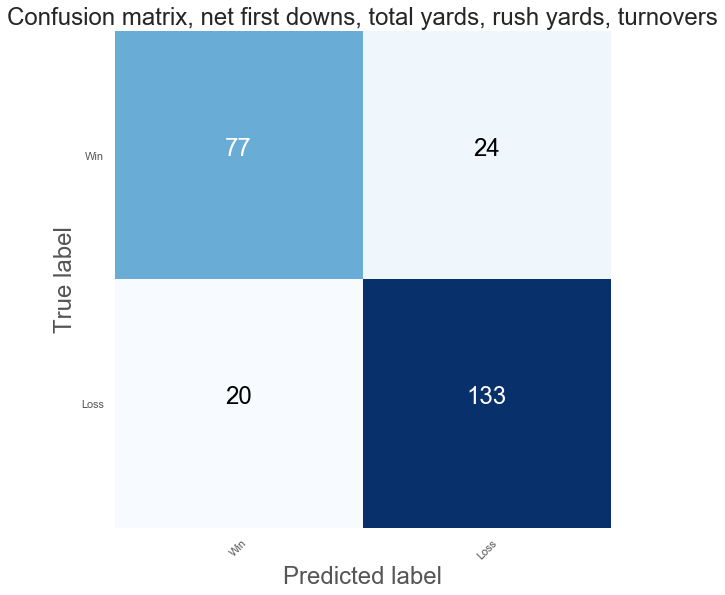

In [269]:

## Fit a logistic regression
y = net_data.iloc[:, 4] # home team wins
x = np.array(net_data.iloc[:, [5, 6, 8, 11]]) # all variables
## Run logistic regression on all the data
all_vars_classifier = LogisticRegression()
# note using .predict() below, which uses default 0.5 for a binary classifier
y_pred = all_vars_classifier.fit(x,y).predict(x) # agh!
y_true = y

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print("| TN | FP |\n| FN | TP |\n")
print(cnf_matrix)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.grid(False)
class_names = ["Win","Loss"]
plot_confusion_matrix(cnf_matrix, ax, classes=class_names,
                      title='Confusion matrix, net first downs, total yards, rush yards, turnovers')

| TN | FP |
| FN | TP |

[[ 80  21]
 [ 13 140]]
Confusion matrix, without normalization
[[ 80  21]
 [ 13 140]]


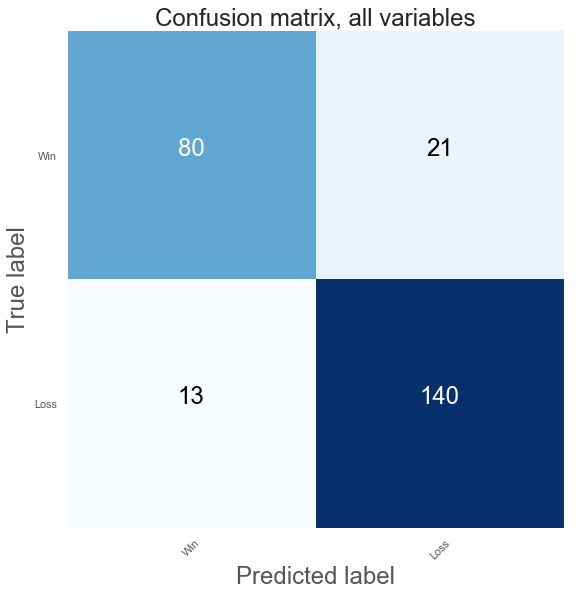

In [271]:

## Fit a logistic regression
y = net_data.iloc[:, 4] # home team wins
x = np.array(net_data.iloc[:, 5:]) # all variables
## Run logistic regression on all the data
all_vars_classifier = LogisticRegression()
# note using .predict() below, which uses default 0.5 for a binary classifier
y_pred = all_vars_classifier.fit(x,y).predict(x) # agh!
y_true = y

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print("| TN | FP |\n| FN | TP |\n")
print(cnf_matrix)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.grid(False)
class_names = ["Win","Loss"]
plot_confusion_matrix(cnf_matrix, ax, classes=class_names,
                      title='Confusion matrix, all variables')

In [261]:
np.array(net_data.iloc[:, 5:])

array([[   2.  ,  -67.  , -106.  , ...,   27.  ,    4.  ,    4.33],
       [  16.  ,  216.  ,  182.  , ..., -140.  ,    5.  ,   10.47],
       [  -2.  ,   19.  ,   42.  , ...,  -17.  ,    6.  ,    0.97],
       ...,
       [   9.  ,  147.  ,  207.  , ...,  -89.  ,   -5.  ,    8.73],
       [   4.  ,   93.  ,   -4.  , ...,   83.  ,  -18.  ,   -1.7 ],
       [ -13.  , -178.  , -113.  , ...,   81.  ,    0.  ,  -20.43]])